In [1]:
import pandas as pd
from scipy import stats as st
df1 = pd.read_csv('/datasets/query_1.csv')
df2 = pd.read_csv('/datasets/query_3.csv')
df3 = pd.read_csv('/datasets/query_last.csv')

In [2]:
df2_lead = df2.sort_values('average_flights', ascending=False).head(10)
df2_lead

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


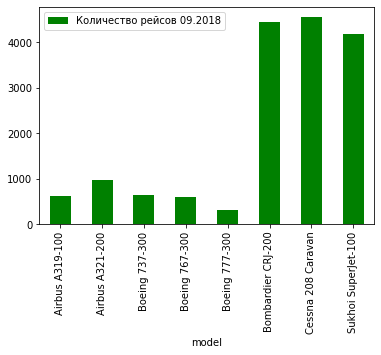

In [9]:
df1.plot(kind='bar', x='model', y='flights_amount', label='Количество рейсов 09.2018', color='g')

На этом графике мы можем увидеть, что самыми популярными являются 3 последние марки самолетов. Судя по их характеристикам, Bombardier и Cessna используются максимум для каких-то внутренних задач аэропорта (Cessna) или для региональных полетов с малым пассажиропотоком (Bombardier). Sukhoi SuperJet явно основной пассажирский лайнер, рассчитанный на дальние перелеты, пользующийся спросом у авиаперевозчиков из-за российского происхождения.

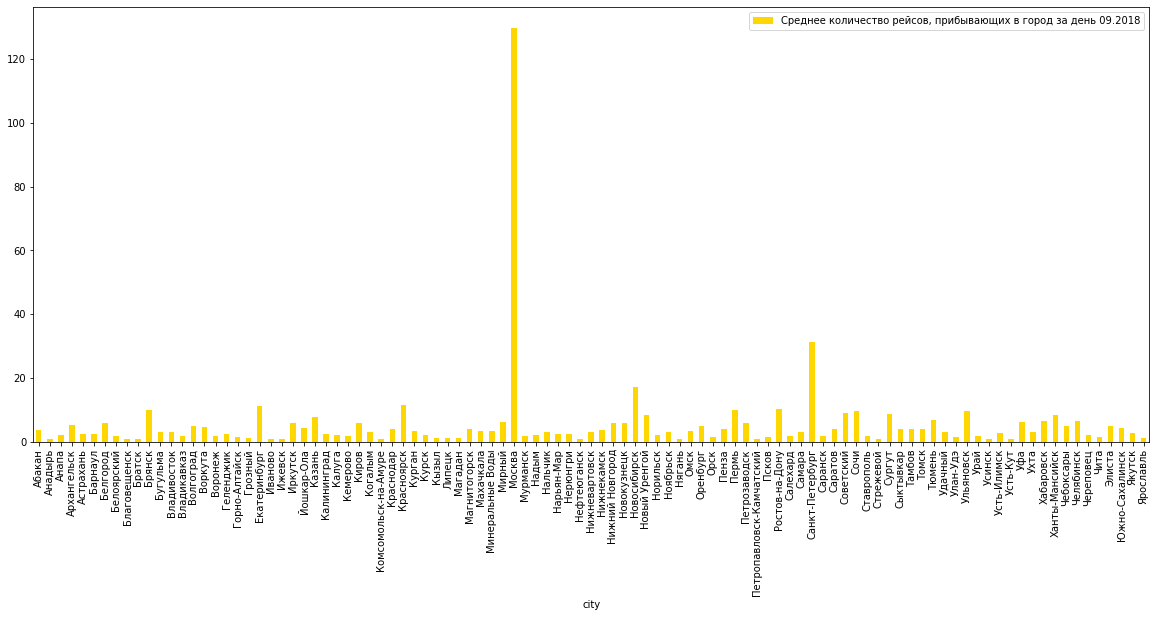

In [4]:
df2.plot(kind='bar', x='city', y='average_flights', label='Cреднее количество рейсов, прибывающих в город за день 09.2018', color='gold', figsize=(20,8))

Что ж, по Российским городам ожидаемо выигрывает Москва. В разы от нее отстает Петербург. Такой разброс по городам связан как минимум с количеством аэропортов в городе, степенью свободы воздуха и туристической заинтересованностью в месте.

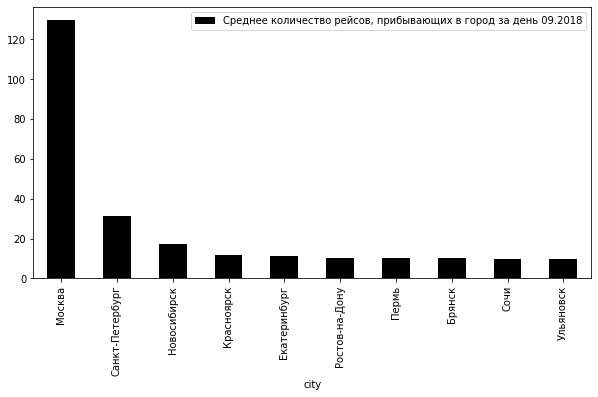

In [5]:
df2_lead.plot(kind='bar', x='city', y='average_flights', label='Cреднее количество рейсов, прибывающих в город за день 09.2018', color='black', figsize=(10,5))

На укрупненном графике видим, что после Москвы, Питера и Новосибирска разница в среднем количестве рейсов размывается и практически незаметна. До 20 рейсов в день - грустная статистика. Малый пассажиропоток - малая мобильность населения - хотя бы положительно сказывается на экологии.

### Шаг 5.


Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время.

In [6]:
df3

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [8]:
df3_F = df3.dropna(subset=['festival_name'])['ticket_amount']
df3_noF = df3['ticket_amount'].where(~df3['festival_name'].index.isin(df3_F.index)).dropna()

alpha = 0.05

result = st.stats.ttest_ind(df3_F, df3_noF, equal_var=False)
print('p-value: {:.2f}'.format(result.pvalue))

p-value: 0.38


Можем подтвердить нулевую гипотезу о равенстве среднего спроса на билеты в любой день. Наличие фестивалей в определенный день не сильно влияют на спрос.

Нулевая гипотеза: среднее значение стоимости билетов в дни фестиваля и безфестивальные дни равно.

В альтернативной гипотезе среднее значение соответственно не равно.

Использовался т-тест, т.к. наблюдения в выборках независимы и нормально распределены.